<a href="https://colab.research.google.com/github/HARINIRODRIGO/AquaGuardian/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing and Enhancing Underwater Images

## Original and CLAHE Image Comparison

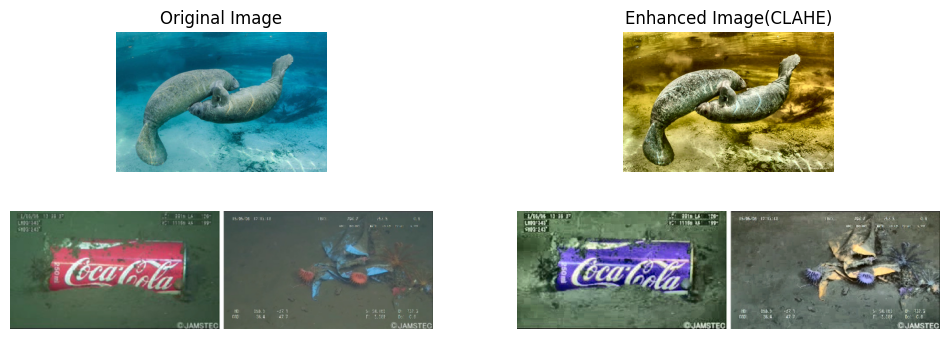

In [ ]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Underwater image enhancement using CLAHE
def enhance_underwater_image_clahe(image, clip_limit=5.0, grid_size=(8, 8)):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    lab_image[:, :, 0] = clahe.apply(lab_image[:, :, 0])
    enhanced_image = cv2.cvtColor(lab_image, cv2.COLOR_LAB2RGB)
    return enhanced_image

# Load and preprocess an image from a URL
def load_and_preprocess_image_from_url(url):
    response = requests.get(url)
    image_bytes = np.frombuffer(response.content, np.uint8)
    image = cv2.imdecode(image_bytes, cv2.IMREAD_COLOR)
    # CLAHE enhancement
    preprocessed_image = enhance_underwater_image_clahe(image)
    return preprocessed_image

def main():
    input_image_url_1 = "https://cdn.shopify.com/s/files/1/0022/4759/0003/files/underwater-sea-animals_large.jpg?v=1531223262"
    input_image_url_2 = "https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-3-031-37731-0_30/MediaObjects/551093_1_En_30_Fig1_HTML.png"

    enhanced_image_1 = load_and_preprocess_image_from_url(input_image_url_1)
    enhanced_image_2 = load_and_preprocess_image_from_url(input_image_url_2)
    plt.figure(figsize=(12, 4))

    # Plot the first image and its enhanced version
    plt.subplot(2, 2, 1)
    plt.title("Original Image")
    original_image_1 = Image.open(BytesIO(requests.get(input_image_url_1).content))
    plt.imshow(original_image_1)
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.title("Enhanced Image(CLAHE)")
    plt.imshow(enhanced_image_1)
    plt.axis("off")

    # Plot the second image and its enhanced version
    plt.subplot(2, 2, 3)
    original_image_2 = Image.open(BytesIO(requests.get(input_image_url_2).content))
    plt.imshow(original_image_2)
    plt.axis("off")

    plt.subplot(2, 2, 4)
    plt.imshow(enhanced_image_2)
    plt.axis("off")

    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
import os

import os

def main():
    input_image_url_1 = "https://sportshub.cbsistatic.com/i/2021/10/11/9b3fa887-7be2-4fb3-93c0-b1d79a733a28/giant-sea-creature-oceanx.jpg"
    input_image_url_2 = "https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-3-031-37731-0_30/MediaObjects/551093_1_En_30_Fig1_HTML.png"

    enhanced_image_1 = load_and_preprocess_image_from_url(input_image_url_1)
    enhanced_image_2 = load_and_preprocess_image_from_url(input_image_url_2)

    # Define the output directory where you want to save the images
    output_directory = "output_images"
    os.makedirs(output_directory, exist_ok=True)  # Create the output directory if it doesn't exist

    # Save the original input images to the local drive
    input_path_1 = os.path.join(output_directory, "input_image_1.png")
    input_path_2 = os.path.join(output_directory, "input_image_2.png")

    input_image_1 = Image.open(BytesIO(requests.get(input_image_url_1).content))
    input_image_2 = Image.open(BytesIO(requests.get(input_image_url_2).content))

    input_image_1.save(input_path_1)
    input_image_2.save(input_path_2)

    # Save the enhanced images to the local drive
    enhanced_path_1 = os.path.join(output_directory, "enhanced_image_1.png")
    enhanced_path_2 = os.path.join(output_directory, "enhanced_image_2.png")

    cv2.imwrite(enhanced_path_1, cv2.cvtColor(enhanced_image_1, cv2.COLOR_RGB2BGR))
    cv2.imwrite(enhanced_path_2, cv2.cvtColor(enhanced_image_2, cv2.COLOR_RGB2BGR))

    print(f"Input images saved to {input_path_1} and {input_path_2}")
    print(f"Enhanced images saved to {enhanced_path_1} and {enhanced_path_2}")

if __name__ == "__main__":
    main()

Input images saved to output_images/input_image_1.png and output_images/input_image_2.png
Enhanced images saved to output_images/enhanced_image_1.png and output_images/enhanced_image_2.png


## Original, CLAHE and CLAHE + ICM Image Comparison  

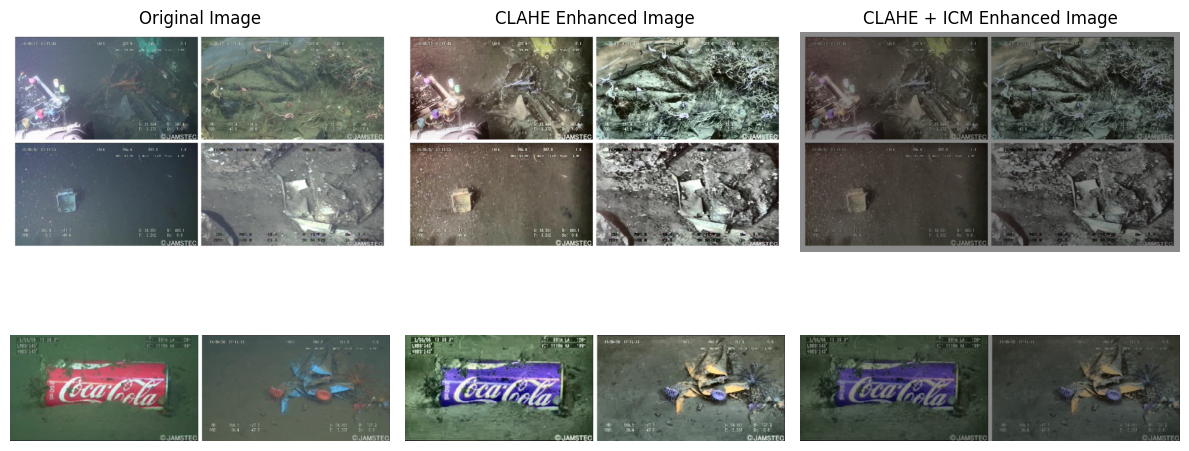

In [ ]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Underwater image enhancement using CLAHE
def enhance_underwater_image_clahe(image, clip_limit=5.0, grid_size=(8, 8)):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    lab_image[:, :, 0] = clahe.apply(lab_image[:, :, 0])
    enhanced_image = cv2.cvtColor(lab_image, cv2.COLOR_LAB2RGB)
    return enhanced_image

# Image Contrast Modification (ICM)
def enhance_underwater_image_icm(image, alpha=0.5, beta=10):
    icm_enhanced = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return icm_enhanced

# Load and preprocess an image from a URL with CLAHE and ICM
def load_and_preprocess_image_from_url(url):
    response = requests.get(url)
    image_bytes = np.frombuffer(response.content, np.uint8)
    image = cv2.imdecode(image_bytes, cv2.IMREAD_COLOR)

    # CLAHE + ICM enhancement
    clahe_enhanced = enhance_underwater_image_clahe(image)
    icm_enhanced = enhance_underwater_image_icm(clahe_enhanced)
    return image, clahe_enhanced, icm_enhanced

def main():
    input_image_url_1 = "https://www.mdpi.com/sensors/sensors-21-06391/article_deploy/html/images/sensors-21-06391-g007.png"
    input_image_url_2 = "https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-3-031-37731-0_30/MediaObjects/551093_1_En_30_Fig1_HTML.png"

  # Load and preprocess images
    original_image_1, clahe_enhanced_image_1, icm_enhanced_image_1 = load_and_preprocess_image_from_url(input_image_url_1)
    original_image_2, clahe_enhanced_image_2, icm_enhanced_image_2 = load_and_preprocess_image_from_url(input_image_url_2)

    plt.figure(figsize=(12, 6))

    # First Image
    plt.subplot(2, 3, 1)
    plt.title("Original Image")
    original_image_1 = Image.open(BytesIO(requests.get(input_image_url_1).content))
    plt.imshow(original_image_1)
    plt.axis("off")

    plt.subplot(2, 3, 2)
    plt.title("CLAHE Enhanced Image")
    plt.imshow(clahe_enhanced_image_1)
    plt.axis("off")

    plt.subplot(2, 3, 3)
    plt.title("CLAHE + ICM Enhanced Image")
    plt.imshow(icm_enhanced_image_1)
    plt.axis("off")

    # Second Image
    plt.subplot(2, 3, 4)
    original_image_2 = Image.open(BytesIO(requests.get(input_image_url_2).content))
    plt.imshow(original_image_2)
    plt.axis("off")

    plt.subplot(2, 3, 5)
    plt.imshow(clahe_enhanced_image_2)
    plt.axis("off")

    plt.subplot(2, 3, 6)
    plt.imshow(icm_enhanced_image_2)
    plt.axis("off")

    # Adjust spacing between subplots
    plt.tight_layout()

    plt.show()

if __name__ == "__main__":
    main()

## Original, CLAHE and TFA Equalization Image Comparison

In [ ]:
!pip install tensorflow
!pip install tensorflow-addons

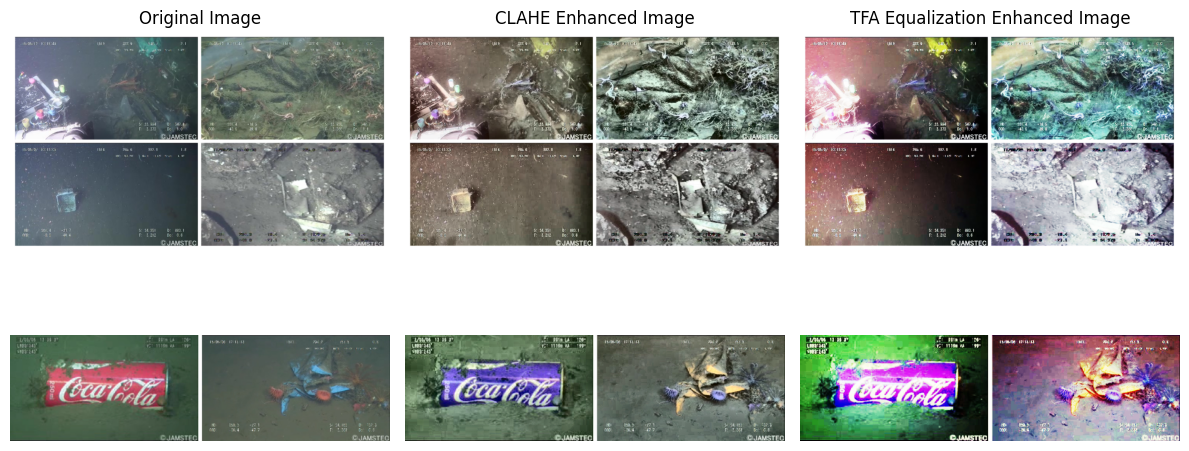

In [ ]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_addons as tfa
from PIL import Image
from io import BytesIO

# Underwater image enhancement using CLAHE
def enhance_underwater_image_clahe(image, clip_limit=5.0, grid_size=(8, 8)):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    lab_image[:, :, 0] = clahe.apply(lab_image[:, :, 0])
    enhanced_image = cv2.cvtColor(lab_image, cv2.COLOR_LAB2RGB)
    return enhanced_image

# TensorFlow Addons Equalization
def enhance_underwater_image_tfa_equalization(image):
    enhanced_image = tfa.image.equalize(image)
    return enhanced_image

# Load and preprocess an image from a URL with CLAHE and TFA Equalization
def load_and_preprocess_image_from_url(url):
    response = requests.get(url)
    image_bytes = np.frombuffer(response.content, np.uint8)
    image = cv2.imdecode(image_bytes, cv2.IMREAD_COLOR)
    # CLAHE contrast enhancement
    clahe_enhanced = enhance_underwater_image_clahe(image)
    # TFA Equalization enhancement
    tfa_enhanced = enhance_underwater_image_tfa_equalization(image)
    return image, clahe_enhanced, tfa_enhanced

def main():
    input_image_url_1 = "https://www.mdpi.com/sensors/sensors-21-06391/article_deploy/html/images/sensors-21-06391-g007.png"
    input_image_url_2 = "https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-3-031-37731-0_30/MediaObjects/551093_1_En_30_Fig1_HTML.png"

    # Load and preprocess images
    original_image_1, clahe_enhanced_image_1, tfa_enhanced_image_1 = load_and_preprocess_image_from_url(input_image_url_1)
    original_image_2, clahe_enhanced_image_2, tfa_enhanced_image_2 = load_and_preprocess_image_from_url(input_image_url_2)
    plt.figure(figsize=(12, 6))

    # First Image
    plt.subplot(2, 3, 1)
    plt.title("Original Image")
    original_image_1 = Image.open(BytesIO(requests.get(input_image_url_1).content))
    plt.imshow(original_image_1)
    plt.axis("off")

    plt.subplot(2, 3, 2)
    plt.title("CLAHE Enhanced Image")
    plt.imshow(clahe_enhanced_image_1)
    plt.axis("off")

    plt.subplot(2, 3, 3)
    plt.title("TFA Equalization Enhanced Image")
    plt.imshow(tfa_enhanced_image_1)
    plt.axis("off")

    # Second Image
    plt.subplot(2, 3, 4)
    original_image_2 = Image.open(BytesIO(requests.get(input_image_url_2).content))
    plt.imshow(original_image_2)
    plt.axis("off")

    plt.subplot(2, 3, 5)
    plt.imshow(clahe_enhanced_image_2)
    plt.axis("off")

    plt.subplot(2, 3, 6)
    plt.imshow(tfa_enhanced_image_2)
    plt.axis("off")

    # Adjust spacing between subplots
    plt.tight_layout()

    plt.show()

if __name__ == "__main__":
    main()


## Original, CLAHE and  CLAHE + TFA Equalization Image Comparison

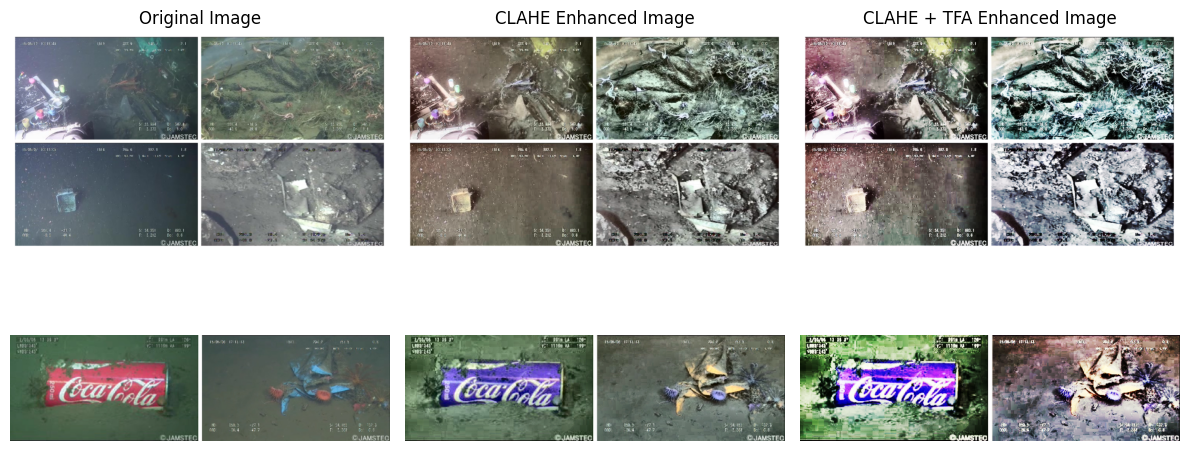

In [ ]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
from PIL import Image
from io import BytesIO

# Underwater image enhancement using CLAHE
def enhance_underwater_image_clahe(image, clip_limit=5.0, grid_size=(8, 8)):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    lab_image[:, :, 0] = clahe.apply(lab_image[:, :, 0])
    enhanced_image = cv2.cvtColor(lab_image, cv2.COLOR_LAB2RGB)
    return enhanced_image

# Load and preprocess an image from a URL with CLAHE and TFA Equalization
def load_and_preprocess_image_from_url(url):
    response = requests.get(url)
    image_bytes = np.frombuffer(response.content, np.uint8)
    image = cv2.imdecode(image_bytes, cv2.IMREAD_COLOR)

    # CLAHE + TFA Equalization enhancement
    clahe_enhanced = enhance_underwater_image_clahe(image)
    tfa_enhanced = tfa.image.equalize(clahe_enhanced)
    return image, clahe_enhanced, tfa_enhanced

def main():
    input_image_url_1 = "https://www.mdpi.com/sensors/sensors-21-06391/article_deploy/html/images/sensors-21-06391-g007.png"
    input_image_url_2 = "https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-3-031-37731-0_30/MediaObjects/551093_1_En_30_Fig1_HTML.png"

    # Load and preprocess images
    original_image_1, clahe_enhanced_image_1, tfa_enhanced_image_1 = load_and_preprocess_image_from_url(input_image_url_1)
    original_image_2, clahe_enhanced_image_2, tfa_enhanced_image_2 = load_and_preprocess_image_from_url(input_image_url_2)
    plt.figure(figsize=(12, 6))

    # First Image
    plt.subplot(2, 3, 1)
    plt.title("Original Image")
    original_image_1 = Image.open(BytesIO(requests.get(input_image_url_1).content))
    plt.imshow(original_image_1)
    plt.axis("off")

    plt.subplot(2, 3, 2)
    plt.title("CLAHE Enhanced Image")
    plt.imshow(clahe_enhanced_image_1)
    plt.axis("off")

    plt.subplot(2, 3, 3)
    plt.title("CLAHE + TFA Enhanced Image")
    plt.imshow(tfa_enhanced_image_1)
    plt.axis("off")

    # Second Image
    plt.subplot(2, 3, 4)
    original_image_2 = Image.open(BytesIO(requests.get(input_image_url_2).content))
    plt.imshow(original_image_2)
    plt.axis("off")

    plt.subplot(2, 3, 5)
    plt.imshow(clahe_enhanced_image_2)
    plt.axis("off")

    plt.subplot(2, 3, 6)
    plt.imshow(tfa_enhanced_image_2)
    plt.axis("off")

    # Adjust spacing between subplots
    plt.tight_layout()

    plt.show()

if __name__ == "__main__":
    main()
